<a href="https://colab.research.google.com/github/sujataprasad01/ML-Credit-Card-Fraud-Detection/blob/main/K_Means_Clustering_(Customer_Segmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans

# dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")

# Data analysis

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# New Section

<Axes: xlabel='Age', ylabel='count'>

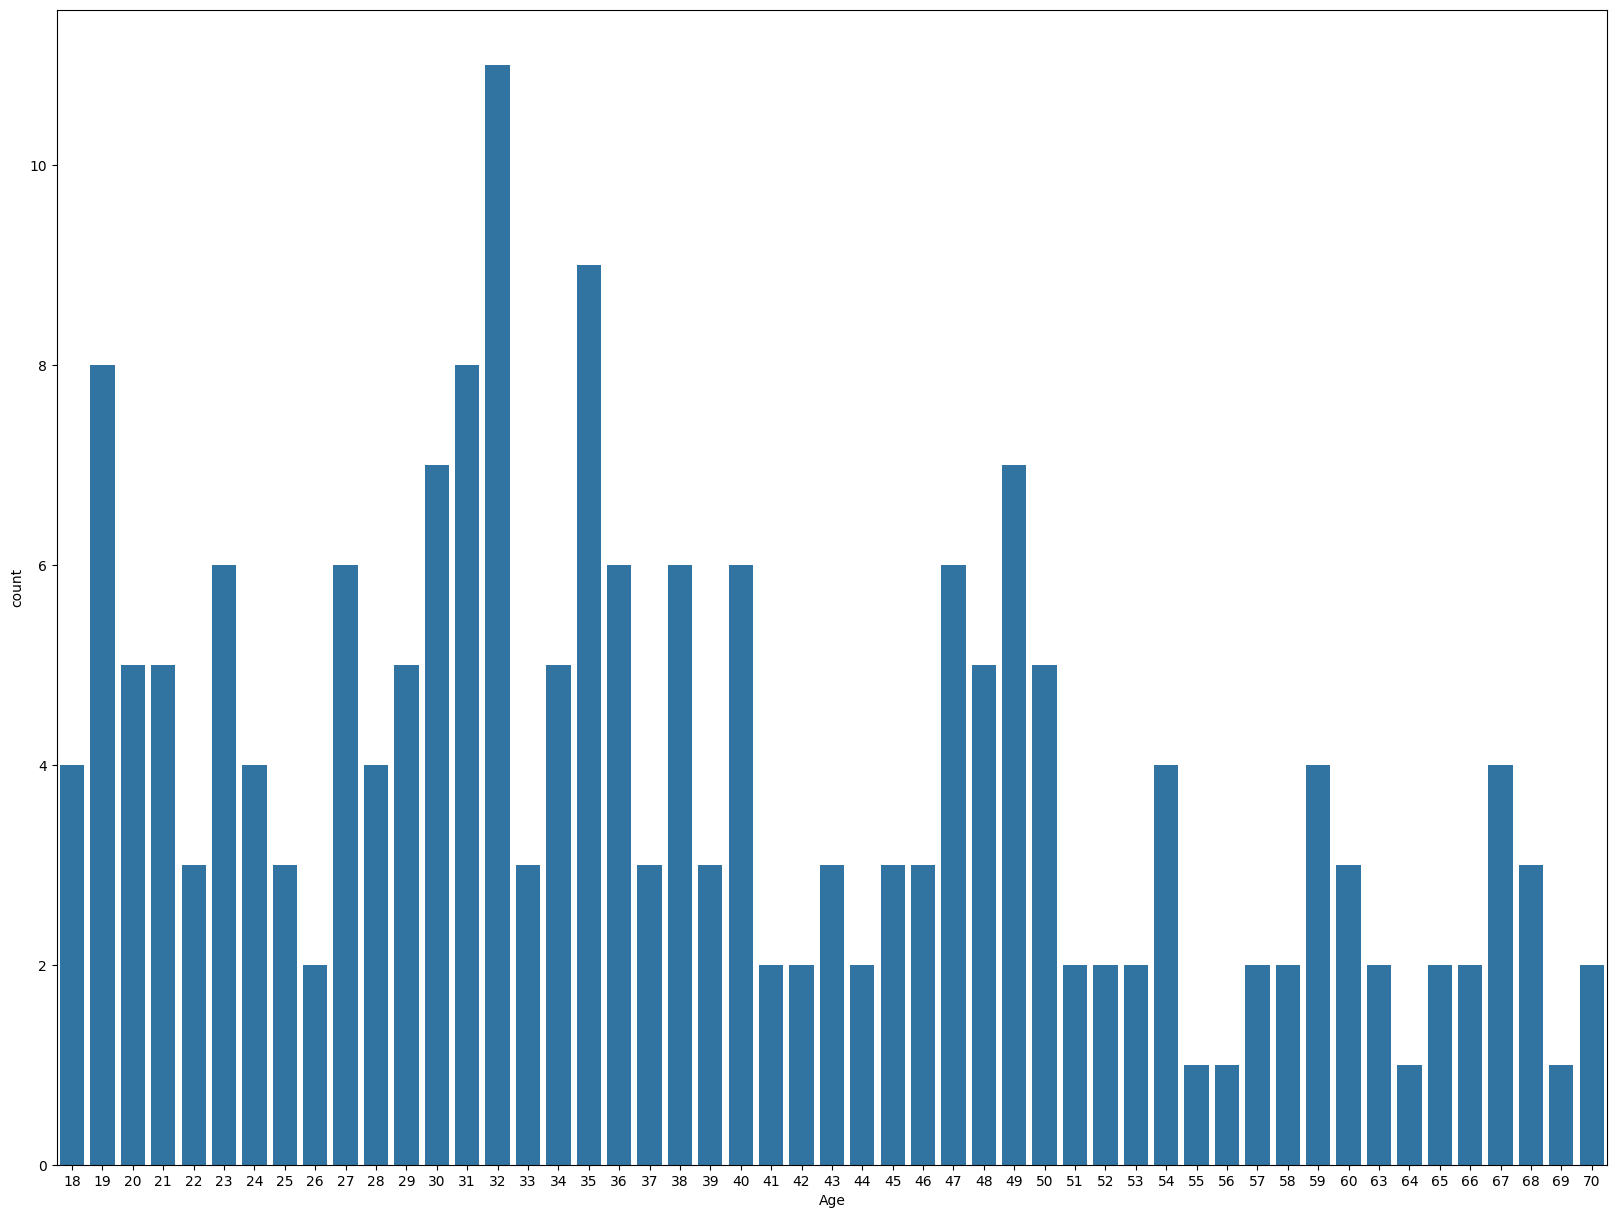

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Age')

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7e61d09f9090>,
 [Text(-0.20611945413751356, 1.080515974257694, ''),
  Text(0.20611945413751367, -1.080515974257694, '')])

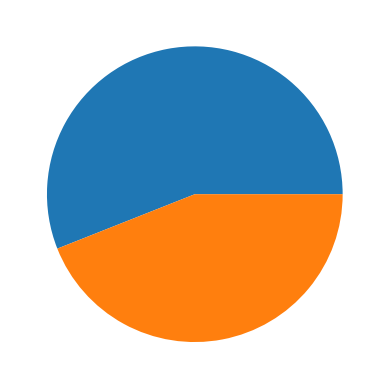

In [ ]:
plt.pie(df['Gender'].value_counts())

<Axes: ylabel='Gender'>

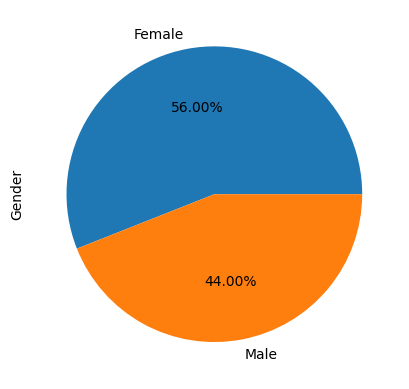

In [ ]:
df.Gender.value_counts().plot(kind='pie', autopct='%.2f%%')

In [ ]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


<Axes: xlabel='Annual Income (k$)', ylabel='count'>

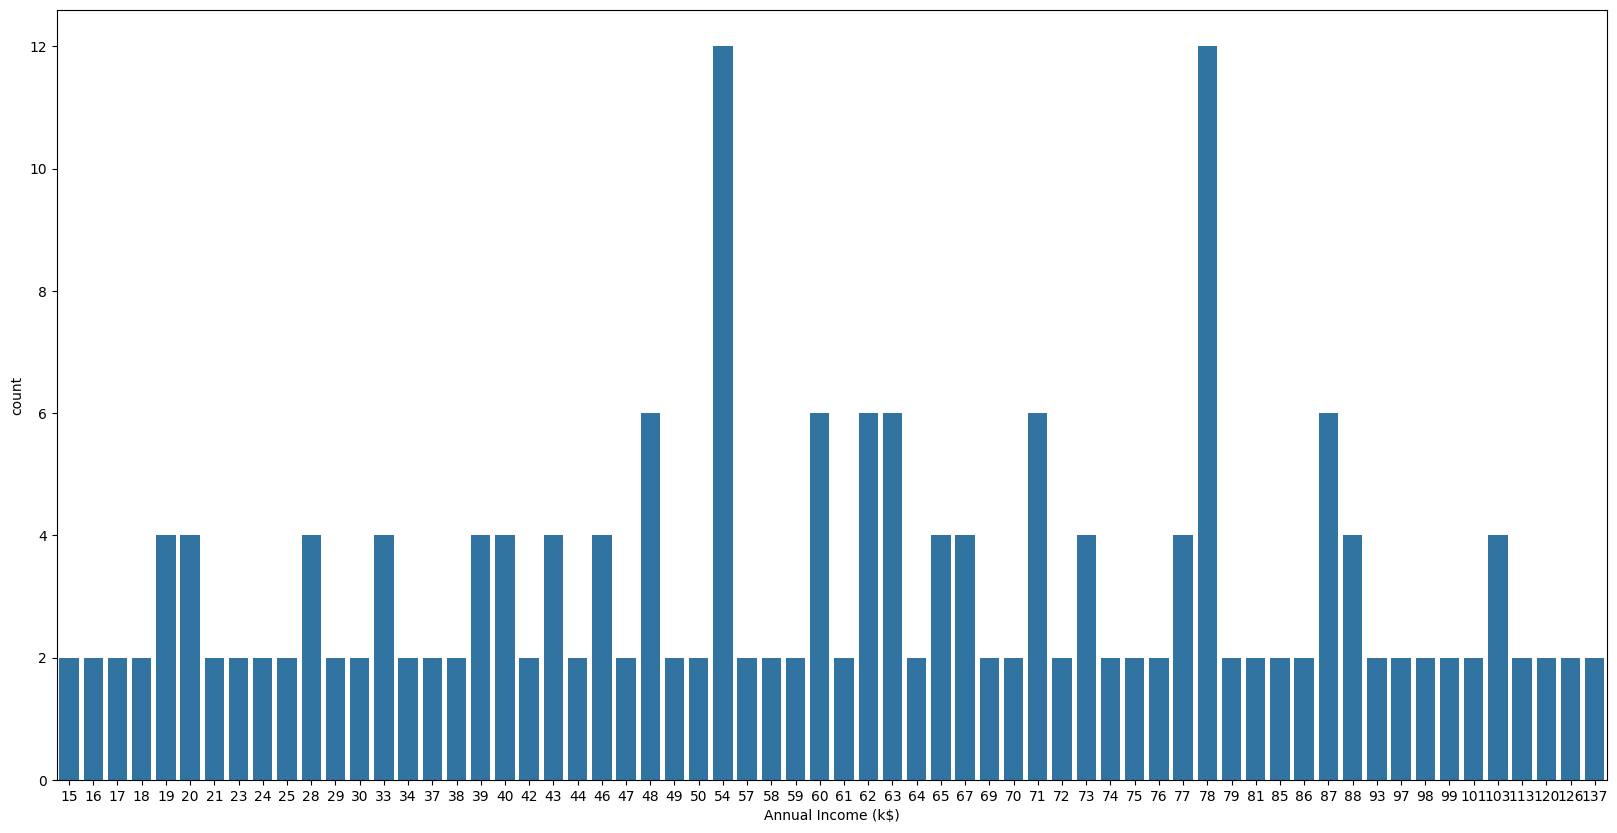

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Annual Income (k$)')

Text(0.5, 1.0, 'Annual Income Distribution w.r.t to Gender')

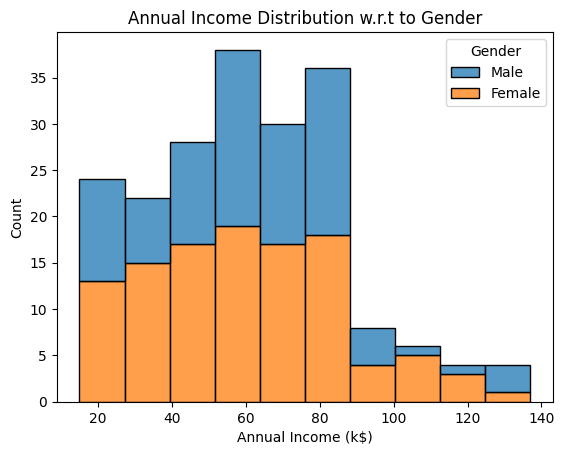

In [ ]:
sns.histplot(df, x='Annual Income (k$)', hue='Gender', bins=10, multiple='stack')
plt.title('Annual Income Distribution w.r.t to Gender')

# Seaborn lmplot()

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


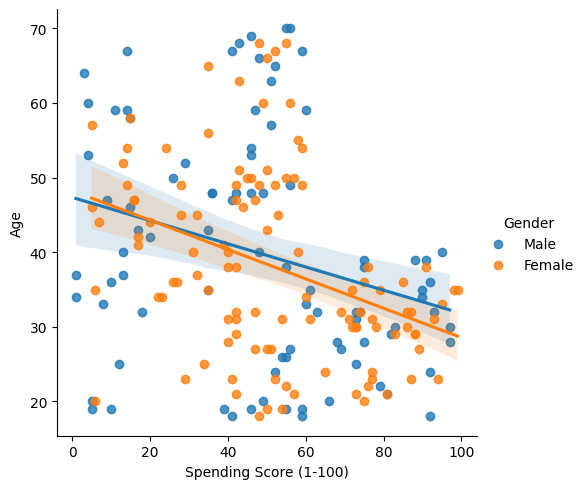

In [ ]:
sns.lmplot(df, x='Spending Score (1-100)', y='Age', hue='Gender')

# New Section

In [3]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [4]:
enc=LabelEncoder()

In [5]:
df.Gender=enc.fit_transform(df.Gender)

In [6]:
df.drop('CustomerID', axis=1, inplace=True)

# New Section

In [7]:
ssd=[]
for i in range(1,11):
  kmodel=KMeans(n_clusters=i, n_init=15, max_iter=500)
  kmodel.fit(df)
  ssd.append(kmodel.inertia_)

In [ ]:
ssd

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58348.641363315044,
 51130.69008126377,
 44389.80767355766,
 40938.426715394104,
 37119.16974887127]

Text(0.5, 1.0, 'Elbow plot')

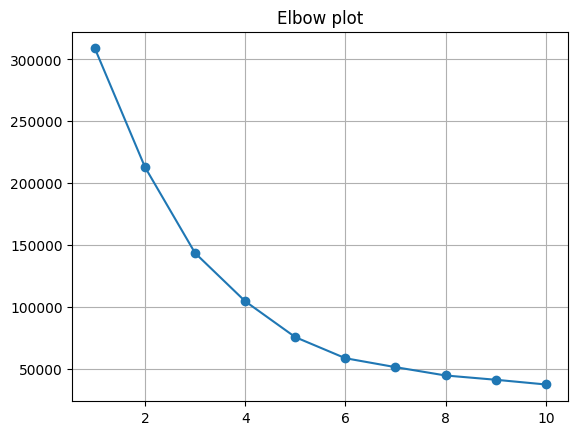

In [ ]:
plt.plot(range(1,11), ssd, marker='o')
plt.grid()
plt.title('Elbow plot')

In [8]:
Kmodel=KMeans(n_clusters=6)

In [9]:
Kmodel.fit(df)
# kmodel.fit_predict(df)
# kmodel.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [10]:
prediction=Kmodel.predict(df)

In [11]:
prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 1,
       4, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 5, 1, 5, 2, 5, 2, 5, 2, 5,
       1, 5, 2, 5, 2, 5, 2, 5, 2, 5, 1, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5], dtype=int32)

In [12]:
Kmodel.cluster_centers_

array([[ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [13]:
len(prediction)

200

In [14]:
len(Kmodel.cluster_centers_)

6

In [15]:
df['Cluster']=prediction

In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [ ]:
sns.color_palette(None,len( np.unique(prediction)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

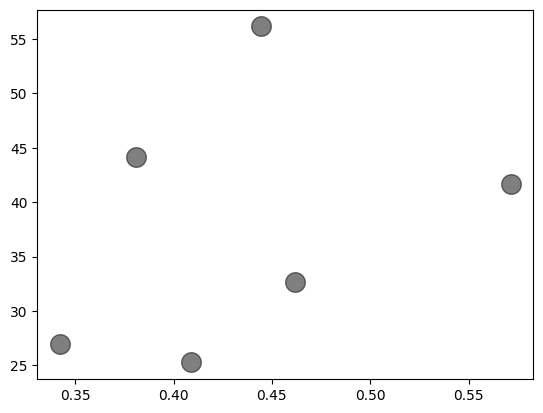

In [17]:
plt.scatter(Kmodel.cluster_centers_[:,0], Kmodel.cluster_centers_[:,1], c='black', s=200, alpha=0.5)

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [22]:
var=linkage(df, method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342

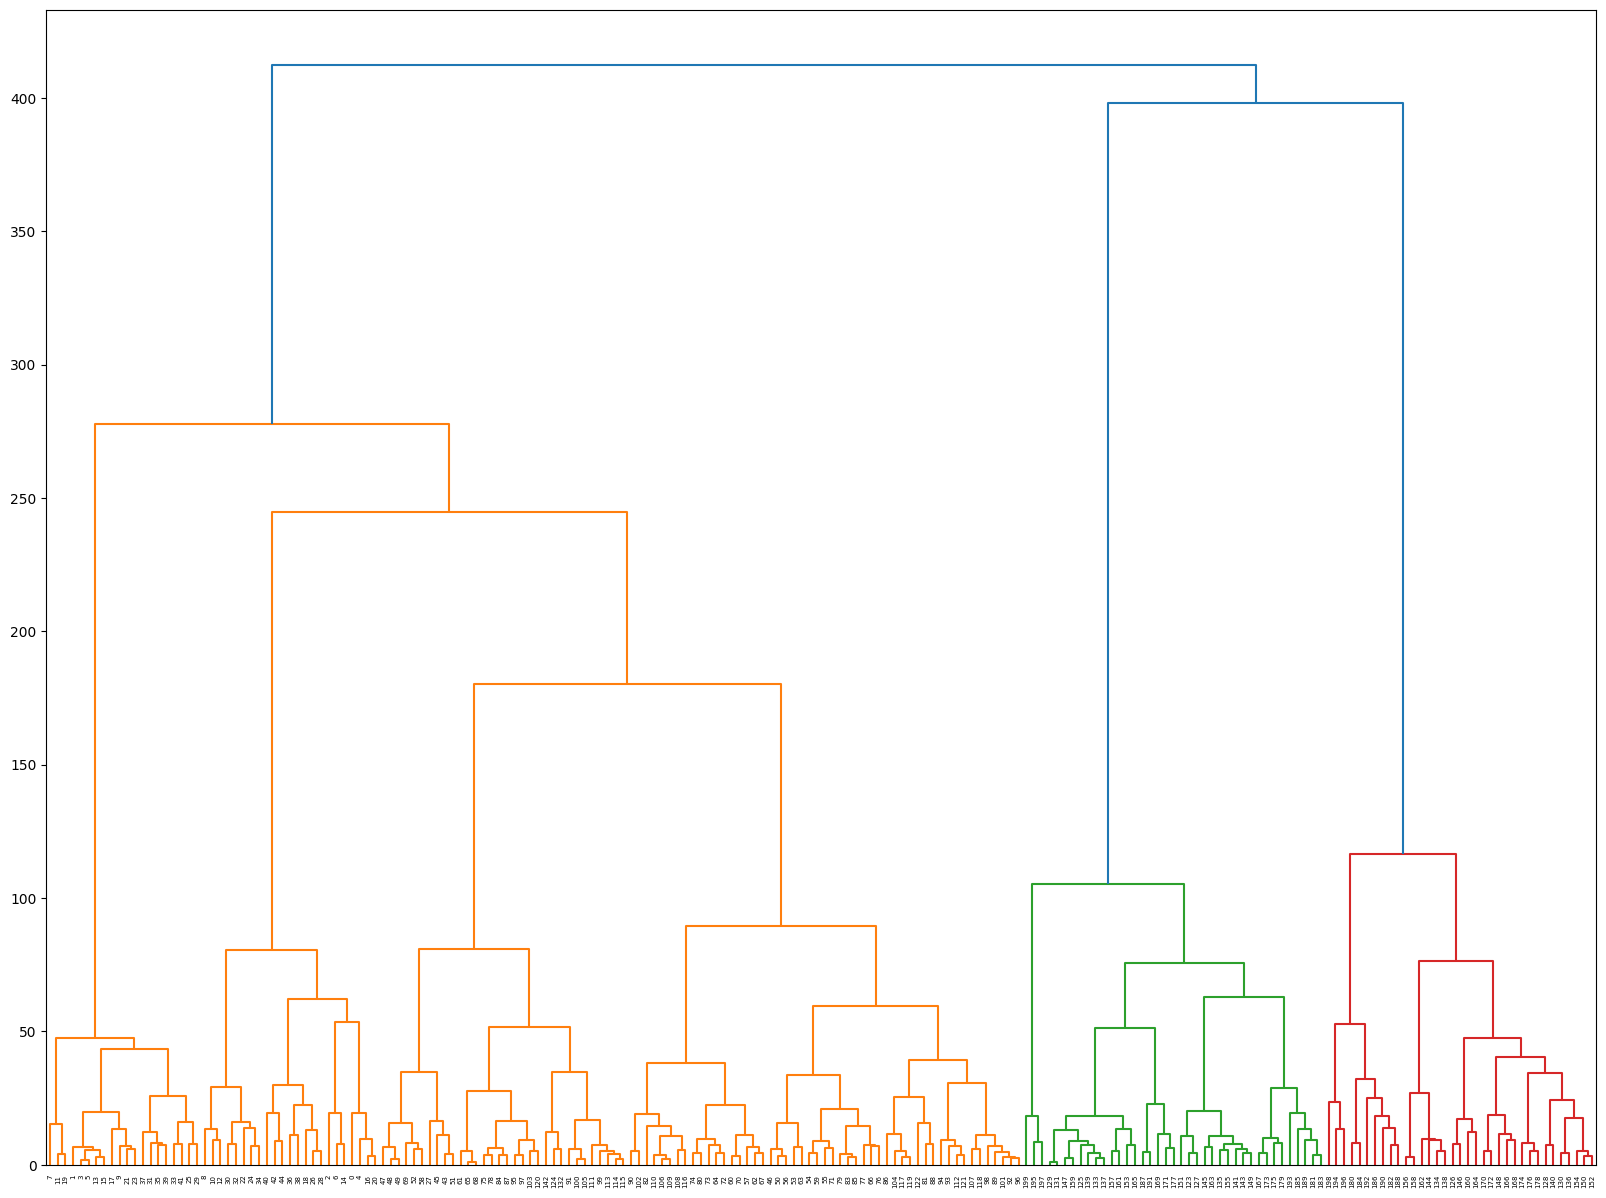

In [24]:
plt.figure(figsize=(20,15))
dendrogram(var, leaf_rotation=90)